## Домашняя работа 5

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [10]:
# как я поняла по этому набору точек обучаем модель

data = pd.read_csv('3.10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [11]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [12]:
degree = 10

X = generate_degrees(data['x_train'], degree)

print(X.shape)

(50, 10)


In [13]:
from sklearn.metrics import mean_squared_error

def train_polynomial(degree, data, debug=False):
    """Генерим данные, тренируем модель
    
    дополнительно рисуем график
    """
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    score = r2_score(data['y_train'], y_pred)
    
    if debug:
        print("Степень полинома %d Ошибка %.8f" % (degree, score))

#     plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
#     plt.plot(data['x_train'], y_pred)

    return score, model

Среди полиномов степени от 1 до 10, степень полинома с наилучшим r2-score: 10. значение score: 0.9091133831293586


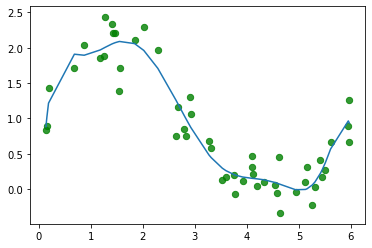

In [14]:
debug = False

max_score = -100
res_degree = -1
res_model = None

for i in range(10):
    degree = i + 1
    cur_score, cur_model = train_polynomial(degree, data, debug)
    if cur_score > max_score:
        res_degree = degree
        max_score = cur_score
        res_model = cur_model
        
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.plot(data['x_train'], res_model.predict(X))

print(f"Среди полиномов степени от 1 до 10, степень полинома с наилучшим r2-score: {res_degree}. значение score: {max_score}")

In [15]:
res_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [38]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

class CustomLinearReg:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        X_ = np.array([np.ones((len(X))), np.array(X)]).T.reshape(-1, 2)
        Y_ = np.array(y).reshape((-1, 1))
        self.w = inv((X_.T).dot(X_)).dot(X_.T).dot(Y_)
    
    def predict(self, X):
        y_pred = []
        
        if self.w is not None: # и ещё проверить на тип и shape
            for i in X: # предполагаем, что X - лист. Отдельно можно добавить проверки и ветки на разные случаи
                y_pred.append(self.w[0][0] + self.w[1][0]*i)
        else:
            print("Модель не построена")
            return None
        return y_pred

In [40]:
lin_reg = CustomLinearReg()
X = [1, 2, 3, 4, 5]
Y = [3, 6, 9, 12, 15]
lin_reg.fit(X, Y)

# x_hw = [50, 60, 70, 100]
# y_hw = [10, 15, 40, 45]
# lin_reg.fit(x_hw, y_hw)
lin_reg.predict(X)

[3.0000000000000093,
 6.000000000000011,
 9.000000000000012,
 12.000000000000014,
 15.000000000000016]

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

X = boston_dataset.data
y = boston_dataset.target

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

In [51]:
y_pred = reg.predict(X_valid)
y_true = y_valid

r2_score(y_true, y_pred)

0.6687594935356329

In [53]:
# посмотрим скор для тренировочной части данных тоже.
r2_score(reg.predict(X_train), y_train)

0.6682392734758833

In [68]:
y_train_transformed = StandardScaler().fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_valid_transformed = StandardScaler().fit_transform(y_valid.reshape(-1, 1)).reshape(-1)

reg = LinearRegression().fit(X_train, y_train_transformed)

In [69]:
y_pred = reg.predict(X_valid)
y_true = y_valid_transformed

r2_score(y_true, y_pred)

# плохое получилось преобразование, качество модели ухудшилось

0.6551060668542077

In [70]:
r2_score(reg.predict(X_train), y_train_transformed)
# а на тренировочных данных осталось почти таким же

0.6682392734758826

In [61]:
X_train_transformed = StandardScaler().fit_transform(X_train)
X_valid_transformed = StandardScaler().fit_transform(X_valid)

reg = LinearRegression().fit(X_train_transformed, y_train_transformed)

In [65]:
y_pred = reg.predict(X_valid_transformed)
y_true = y_valid_transformed

r2_score(y_true, y_pred)

0.672726248436536

In [66]:
r2_score(reg.predict(X_train_transformed), y_train_transformed)

0.6682392734758831